# Cylindrical Systems In General Relativity by Bronnikov  Santos and Wang
##  Geoff Cope
##  Univeristy of Utah
##  December 22, 2021

This is a very long paper with quite a few metrics, here we concentrate on metric 9.2  This metric also appears in the paper "Gravitational Analaogue of Farady Rotation by Piran and Safier" linked to down below.  We'll finish the other metrics at a later date.  The field equations at the bottom listed as equations 3 thru 5 match those given in the Piran and Safier paper. TO DO:  Bondi's Radiating Metric appears as equation 32, add this later.

https://arxiv.org/abs/1901.06561

https://www.nature.com/articles/318271a0

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,r,phi,z,dt,dr,dphi,dz = symbols( 't r phi z dt dr dphi dz' ) 

In [4]:
psi, omega, gamma = symbols( 'psi omega gamma')

In [5]:
psi = Function('psi')(r,t)
psi

In [6]:
omega = Function('omega')(r,t)
omega

In [7]:
gamma = Function('gamma')(r,t)
gamma

In [8]:
variables = Matrix( [t,r,phi,z] )
variables

⎡t⎤
⎢ ⎥
⎢r⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [9]:
differentials = Matrix( [dt,dr,dphi,dz] ) 
differentials

⎡ dt ⎤
⎢    ⎥
⎢ dr ⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [10]:
lineElement = expand(exp(2*(gamma-psi)) * (dt**2 - dr**2) - exp(2*psi) * (dz + omega * dphi)**2 - r**2*exp(-2*psi)*dphi**2)
lineElement

In [11]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡ 2⋅γ(r, t)  -2⋅ψ(r, t)                                                                                      ⎤
⎢ℯ         ⋅ℯ                       0                               0                              0         ⎥
⎢                                                                                                            ⎥
⎢                          2⋅γ(r, t)  -2⋅ψ(r, t)                                                             ⎥
⎢          0             -ℯ         ⋅ℯ                              0                              0         ⎥
⎢                                                                                                            ⎥
⎢                                                    2  -2⋅ψ(r, t)    2        2⋅ψ(r, t)            2⋅ψ(r, t)⎥
⎢          0                        0             - r ⋅ℯ           - ω (r, t)⋅ℯ           -ω(r, t)⋅ℯ         ⎥
⎢                                                                                                            ⎥
⎢

In [12]:
import sympy

In [13]:
m = sympy.Array(g)
m

⎡ 2⋅γ(r, t)  -2⋅ψ(r, t)                                                                                      ⎤
⎢ℯ         ⋅ℯ                       0                               0                              0         ⎥
⎢                                                                                                            ⎥
⎢                          2⋅γ(r, t)  -2⋅ψ(r, t)                                                             ⎥
⎢          0             -ℯ         ⋅ℯ                              0                              0         ⎥
⎢                                                                                                            ⎥
⎢                                                    2  -2⋅ψ(r, t)    2        2⋅ψ(r, t)            2⋅ψ(r, t)⎥
⎢          0                        0             - r ⋅ℯ           - ω (r, t)⋅ℯ           -ω(r, t)⋅ℯ         ⎥
⎢                                                                                                            ⎥
⎢

In [14]:
from einsteinpy.symbolic import *

In [15]:
syms = sympy.symbols("t r phi z")
t,r,phi,z = syms

In [16]:
metric = MetricTensor(m,syms)

In [17]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢                                                                                                                          
⎢⎡∂             ∂            ∂             ∂                                                                               
⎢⎢──(γ(r, t)) - ──(ψ(r, t))  ──(γ(r, t)) - ──(ψ(r, t))                                             0                       
⎢⎢∂t            ∂t           ∂r            ∂r                                                                              
⎢⎢                                                                                                                         
⎢⎢∂     

In [18]:
Ric = RicciTensor.from_metric(metric)
simplify(Ric.tensor())

⎡                                                                                                                          
⎢                                                                               ∂             ∂              4⋅ψ(r, t) ⎛∂  
⎢  2              2              2                           2     2            ──(γ(r, t))   ──(ψ(r, t))   ℯ         ⋅⎜──(
⎢ ∂              ∂              ∂               ⎛∂          ⎞     ∂             ∂r            ∂r                       ⎝∂t 
⎢───(γ(r, t)) - ───(γ(r, t)) - ───(ψ(r, t)) - 2⋅⎜──(ψ(r, t))⎟  + ───(ψ(r, t)) + ─────────── - ─────────── - ───────────────
⎢  2              2              2              ⎝∂t         ⎠      2                 r             r                      2
⎢∂r             ∂t             ∂r                                ∂t                                                    2⋅r 
⎢                                                                                                                          
⎢       

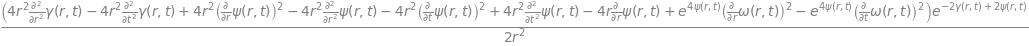

In [19]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [20]:
einst = EinsteinTensor.from_metric(metric)
simplify(einst.tensor())

⎡                                                                                   2                                2     
⎢                                        ∂                   4⋅ψ(r, t) ⎛∂          ⎞          4⋅ψ(r, t) ⎛∂          ⎞      
⎢               2                2   1.0⋅──(γ(r, t))   0.25⋅ℯ         ⋅⎜──(ω(r, t))⎟    0.25⋅ℯ         ⋅⎜──(ω(r, t))⎟      
⎢  ⎛∂          ⎞    ⎛∂          ⎞        ∂r                            ⎝∂r         ⎠                    ⎝∂t         ⎠      
⎢- ⎜──(ψ(r, t))⎟  - ⎜──(ψ(r, t))⎟  + ─────────────── - ────────────────────────────── - ──────────────────────────────     
⎢  ⎝∂r         ⎠    ⎝∂t         ⎠           r                         2                                2                   
⎢                                                                    r                                r                    
⎢                                                                                                                          
⎢       

In [21]:
# rm1 = RiemannCurvatureTensor.from_christoffels(ch)
# rm1.tensor()

In [22]:
# weyl = WeylTensor.from_metric(metric)
# weyl.tensor()

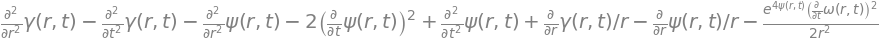

In [23]:
ricci00 = simplify(Ric.tensor())[0,0]
ricci00 

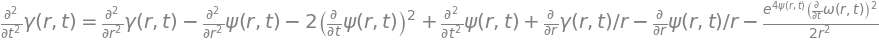

In [24]:
Eq((-1)*ricci00.args[0],solve(ricci00,(-1)*ricci00.args[0])[0])

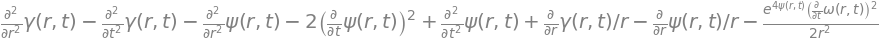

In [25]:
ricci00

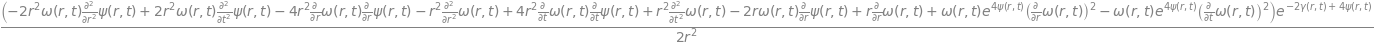

In [26]:
ricci23 = simplify(Ric.tensor())[2,3]
ricci23 

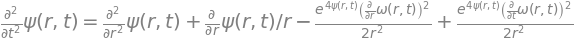

In [27]:
equation2 = Eq(diff(psi,t,t), expand(solve( simplify(Ric.tensor())[3,3] , diff(psi,t,t) )[0]) ) 
equation2

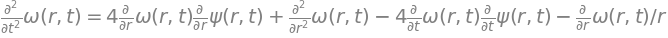

In [28]:
equation3 = Eq(diff(omega,t,t),solve( simplify(simplify(Ric.tensor())[2,2].subs(equation2.args[0],equation2.args[1] )), diff(omega,t,t) )[0])
equation3

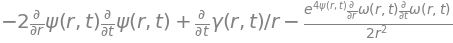

In [29]:
ricci10 = simplify(Ric.tensor())[1,0]
ricci10 

In [30]:
equation5 =  Eq(diff(gamma,t),solve( ricci10 , diff(gamma,t) )[0])
equation5 

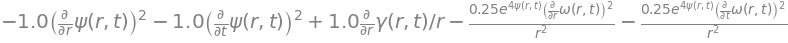

In [31]:
einstein00 = simplify(einst.tensor())[0,0]
einstein00 

In [32]:
equation4 = Eq(diff(gamma,r),expand(solve( einstein00 , diff(gamma,r))[0]))
equation4

In [33]:
fieldEquations = Matrix([equation2,equation3,equation4,equation5])

/opt/anaconda3/lib/python3.8/site-packages/sympy/matrices/repmatrix.py:98: SymPyDeprecationWarning: 

non-Expr objects in a Matrix has been deprecated since SymPy 1.9. Use
list of lists, TableForm or some other data structure instead. See
https://github.com/sympy/sympy/issues/21497 for more info.

  SymPyDeprecationWarning(
